# Data Wrangling and EDA

### a. Movies Dataset

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Loading Dataset
m_data = pd.read_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Raw_data/movies_metadata.csv')

/Users/Atabay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
m_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### a. Handling Missing Data

In [4]:
m_data.shape

(45466, 24)

In [5]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
#Checking for null values
m_data.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

There are null values in most of the columns. However, belongs_to_collection, homepage and tagline consists of mostly null values. Removing those columns can help us to have a more coherent dataset.

In [7]:
#Removing columns
m_data.drop(["belongs_to_collection", "homepage", "tagline"], axis=1, inplace=True)

We cannot fill overview of movies automatically or manually therefore we can drop those rows.

In [8]:
drop_rows = m_data[m_data.overview.isnull()]
drop_rows = drop_rows.index
m_data.drop(drop_rows, inplace=True)

In [9]:
m_data.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  15
original_language        10
original_title            0
overview                  0
popularity                5
poster_path             346
production_companies      3
production_countries      3
release_date             74
revenue                   6
runtime                   6
spoken_languages          6
status                   71
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64

In [10]:
#Dropping rows with no language
drop_lang = m_data[m_data.original_language.isnull()]
drop_lang = drop_lang.index
m_data.drop(drop_lang, inplace=True)

In [11]:
#Dropping rows where poster path is null
drop_poster_path = m_data[m_data.poster_path.isnull()]
drop_poster_path = drop_poster_path.index
m_data.drop(drop_poster_path, inplace=True)

In [12]:
#Dropping rows where release date is null
drop_release = m_data[m_data.release_date.isnull()]
drop_release = drop_release.index
m_data.drop(drop_release, inplace=True)

In [13]:
#Dropping rows with no status
drop_status = m_data[m_data.status.isnull()]
drop_status = drop_status.index
m_data.drop(drop_status, inplace=True)

In [14]:
m_data.shape

(44058, 21)

In [15]:
m_data.isna().sum()

adult                    0
budget                   0
genres                   0
id                       0
imdb_id                 10
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

Apart from imdb_id we don't have any columns with null values. Because we have already have an id column we can drop imdb_id.

In [16]:
#Dropping rows with no imdb_id
drop_status = m_data[m_data.imdb_id.isnull()]
drop_status = drop_status.index
m_data.drop(drop_status, inplace=True)

In [17]:
m_data.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

We don't have any null values anymore.

### b. Duplicate Values

In [18]:
m_data[m_data.duplicated(keep=False)].sort_values('id')

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
676,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,The Promise,False,5.0,1.0
1465,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,The Promise,False,5.0,1.0
24844,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Deal,False,5.2,22.0
14012,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Deal,False,5.2,22.0
21165,False,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",0.000018,/gLVRTxaLtUDkfscFKPyYrCtRnTk.jpg,...,[],1980-02-27,0.0,123.0,[],Released,The Tempest,False,0.0,0.0
19890,False,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",0.000018,/gLVRTxaLtUDkfscFKPyYrCtRnTk.jpg,...,[],1980-02-27,0.0,123.0,[],Released,The Tempest,False,0.0,0.0
13375,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Blackout,False,6.7,3.0
16764,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Blackout,False,6.7,3.0
13261,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Blackout,False,6.7,3.0
21854,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",152795,tt1821641,en,The Congress,More than two decades after catapulting to sta...,8.534039,/nnKX3ahYoT7P3au92dNgLf4pKwA.jpg,...,"[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",2013-05-16,455815.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Congress,False,6.4,165.0


In [19]:
m_data = m_data.drop_duplicates()

In [20]:
m_data[m_data.duplicated(keep=False)].sort_values('id')

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count


### c. Checking Outliers

In [21]:
m_data.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,44035.0,1.157023e+07,6.533298e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,44035.0,9.537672e+01,3.721646e+01,0.0,86.0,95.0,107.0,1.256000e+03
vote_average,44035.0,5.673716e+00,1.846964e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,44035.0,1.132359e+02,4.988268e+02,0.0,3.0,10.0,36.0,1.407500e+04


Most values in revenue seems to be zero. This means either revenue information is not avaliable or these movies were not shown in theaters. 

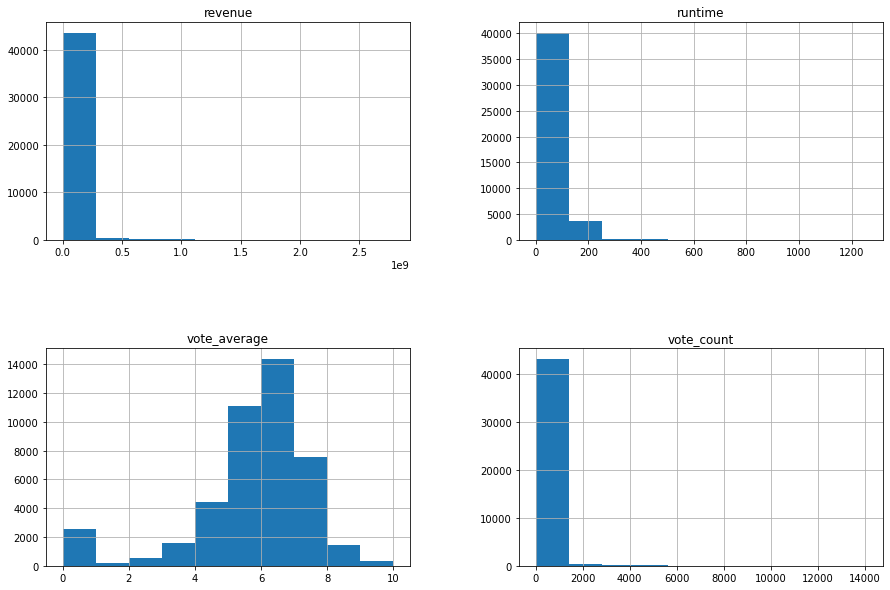

In [22]:
m_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [23]:
m_data[m_data.revenue != 0]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45381,False,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",264269,tt2400314,ru,Vladeniye 18,"Sveta and Maxim, a happy newlyweds, are moving...",0.217441,/aU51pWVHtLVsFOJA88Gp7F5l1CY.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2014-03-13,320395.0,90.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Apartment 18,False,4.4,4.0
45401,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",240789,tt1197626,ru,Чудо,The film is based on real events that took pla...,0.436028,/AjXZQPdV5PUibMqVPXVFCZ4VK4N.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2009-10-09,50656.0,110.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,The Miracle,False,6.3,3.0
45409,False,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,tt0933361,en,Dikari,"The sea, August, interesting and simple people...",0.903061,/t14Sb80sXJCAa3ERs0UoheXhSD9.jpg,...,[],2006-11-23,1328612.0,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Savages,False,5.8,6.0
45412,False,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,tt1718881,en,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,/f8umkhHSctmiU4hw7U1IK1JxFT7.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2010-09-30,1268793.0,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Pro Lyuboff,False,4.0,3.0


This shows that many movies have revenue of zero. This indicates that either they didn't earn any money from ticket sales or this information is not avaliable. Removing revenue column from the dataset would make the analysis more complete.

In [24]:
#Dropping the revenue column
m_data.drop(["revenue"], axis=1, inplace=True)

In [25]:
m_data.shape

(44035, 20)

Now, the dataset is clean and ready for modeling 

In [26]:
#Save the dataset
m_data.to_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Data/m_data_cleaned.csv', index = False)

### b. Credits Dataset

In [27]:
#Loading Dataset
c_data = pd.read_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Raw_data/credits.csv')

In [28]:
c_data.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [34]:
c_data.shape

(45439, 3)

In [29]:
#Checking for null values
c_data.isna().sum()

cast    0
crew    0
id      0
dtype: int64

No null values

In [30]:
# Checking for duplicate values
c_data[c_data.duplicated(keep=False)].sort_values('id')

,cast,crew,id
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
7345,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
25895,"[{'cast_id': 11, 'character': 'Mike Gaucher / ...","[{'credit_id': '52fe44b8c3a36847f80a6389', 'de...",8767
...,...,...,...
25897,[],"[{'credit_id': '52fe4d119251416c7512ed39', 'de...",187156
25954,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
25887,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189


In [31]:
# Removing duplicates
c_data = c_data.drop_duplicates()

In [32]:
c_data[c_data.duplicated(keep=False)].sort_values('id')

,cast,crew,id


Credits data is ready for modeling

In [35]:
#Save the dataset
c_data.to_csv('/Users/Atabay/Desktop/Movie_Recommendation_System_data/Data/c_data_cleaned.csv', index = False)